In [37]:
import collections
import math

def entropy(l):
    c = collections.Counter(l)
    p = [v/len(l) for v in c.values()]
    return -sum([p[i]*math.log2(p[i]) for i in range(len(p))])


In [38]:
from random import randint
d=[randint(0,1) for _ in range(100)]
print(d)
entropy(d)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]


0.9895875212220557

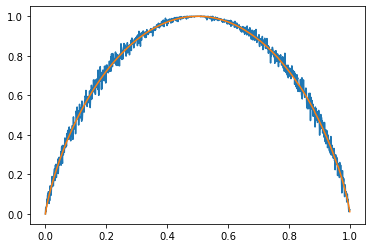

In [39]:
import matplotlib.pyplot as plt
import numpy as np

sample = 1000
x = np.arange(0,1,1/sample)

plt.plot(x, [entropy(np.random.binomial(1, 1-i, size=1000)) for i in x])
plt.plot(x, [entropy([1]*int((1-i)*sample)+[0]*int(i*sample)) for i in x])
pass


Question 3 

Let $S$ be a discrete source with memory using the binary alphabet $𝒜 = \{0,1\}$.

To compute the entropy of such a source, accounting for the memory effect would require conditioning the entropy of the current
symbol with respect to its past up to some order $q$ :

   \begin{equation*}
   H(x_k) = \sum_{𝒜} H(x_k | x_{k-1},x_{k-2},...,x_{k-q})p(x_k | x_{k-1},x_{k-2},...,x_{k-q})
   \end{equation*}
where 𝒜 is the set of all possible outputs of the random variables $\{x_{k-1}, x_{k-2},..., x_{k-q}\}$.

We consider here the case of a first order memory effect $q = 1$ (Markov chain). Thus, we have :

$\begin{equation*}H(x_k) = \sum_{𝒜} H(x_k | x_{k-1})p(x_{k-1})\end{equation*}$

A first order Markov chain is completely defined by its transition matrix $\Pi$: 

$$\Pi = \begin{pmatrix} p(x_k = 0 | x_{k-1} = 0) & p(x_k = 1 | x_{k-1} = 0) \\ p(x_k = 0 | x_{k-1} = 1) & p(x_k = 1 | x_{k-1} = 1) \end{pmatrix} = \begin{pmatrix} p_{00} & p_{10} \\ p_{01} & p_{11}\end{pmatrix}$$

We define $p_0$ and $p_1$ as follows: $p_0 = p(x_k = 0)$ and $p_1 = p(x_k = 1) = 1 - p_0$.

Moreover, the Markov chain is stationnary, so $P = P\Pi$ where $P = \begin{pmatrix} p_0 & p_1 \end{pmatrix}$.

Thus $P = \begin{pmatrix} p_0 & p_1 \end{pmatrix}\begin{pmatrix} p_{00} & p_{10} \\ p_{01} & p_{11}\end{pmatrix}
\Leftrightarrow \bigg\{ \begin{array}{11}p_0 = p_0 p_{00} + p_1 p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$
$\Leftrightarrow \bigg\{ \begin{array}{11}p_0 = p_0 p_{00} + (1-p_0)p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$
$\Leftrightarrow \bigg\{ \begin{array}{11}p_0(1-p_{00}+ p_{01}) = p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$

Finally: $\boxed{ \begin{array}{11} p_0 = \frac{p_{01}}{1-p_{00}+p_{01}} \\ p_1 = 1-p_0 = 1-\frac{p_{01}}{1-p_{00}+p_{01}}= \frac{1 - p_{00}}{1-p_{00}+p_{01}} \end{array}}$

Moreover: $\begin{equation*}H(x_k) = \sum_{𝒜} H(x_k | x_{k-1})p(x_{k-1})\end{equation*}$

$=H(x_k|x_{k-1}=0)p_0 + H(x_k|x_{k-1}=1)p_1$

$= -\left[p(x_k=0|x_{k-1}=0)\log_2(x_k=0|x_{k-1}=0) + p(x_k=1|x_{k-1}=0)\log_2(x_k=1|x_{k-1}=0)\right]p_0 
-\left[p(x_k=0|x_{k-1}=1)\log_2(x_k=0|x_{k-1}=1) + p(x_k=1|x_{k-1}=1)\log_2(x_k=1|x_{k-1}=1)\right]p_1$

$=\boxed{\begin{array}{rcl}-(p_{00}\log_2(p_{00})+p_{10}\log_2(p_{10}))p_0 - (p_{01}\log_2(p_{01}) + p_{11}\log_2(p_{11}))p_1\end{array}}$


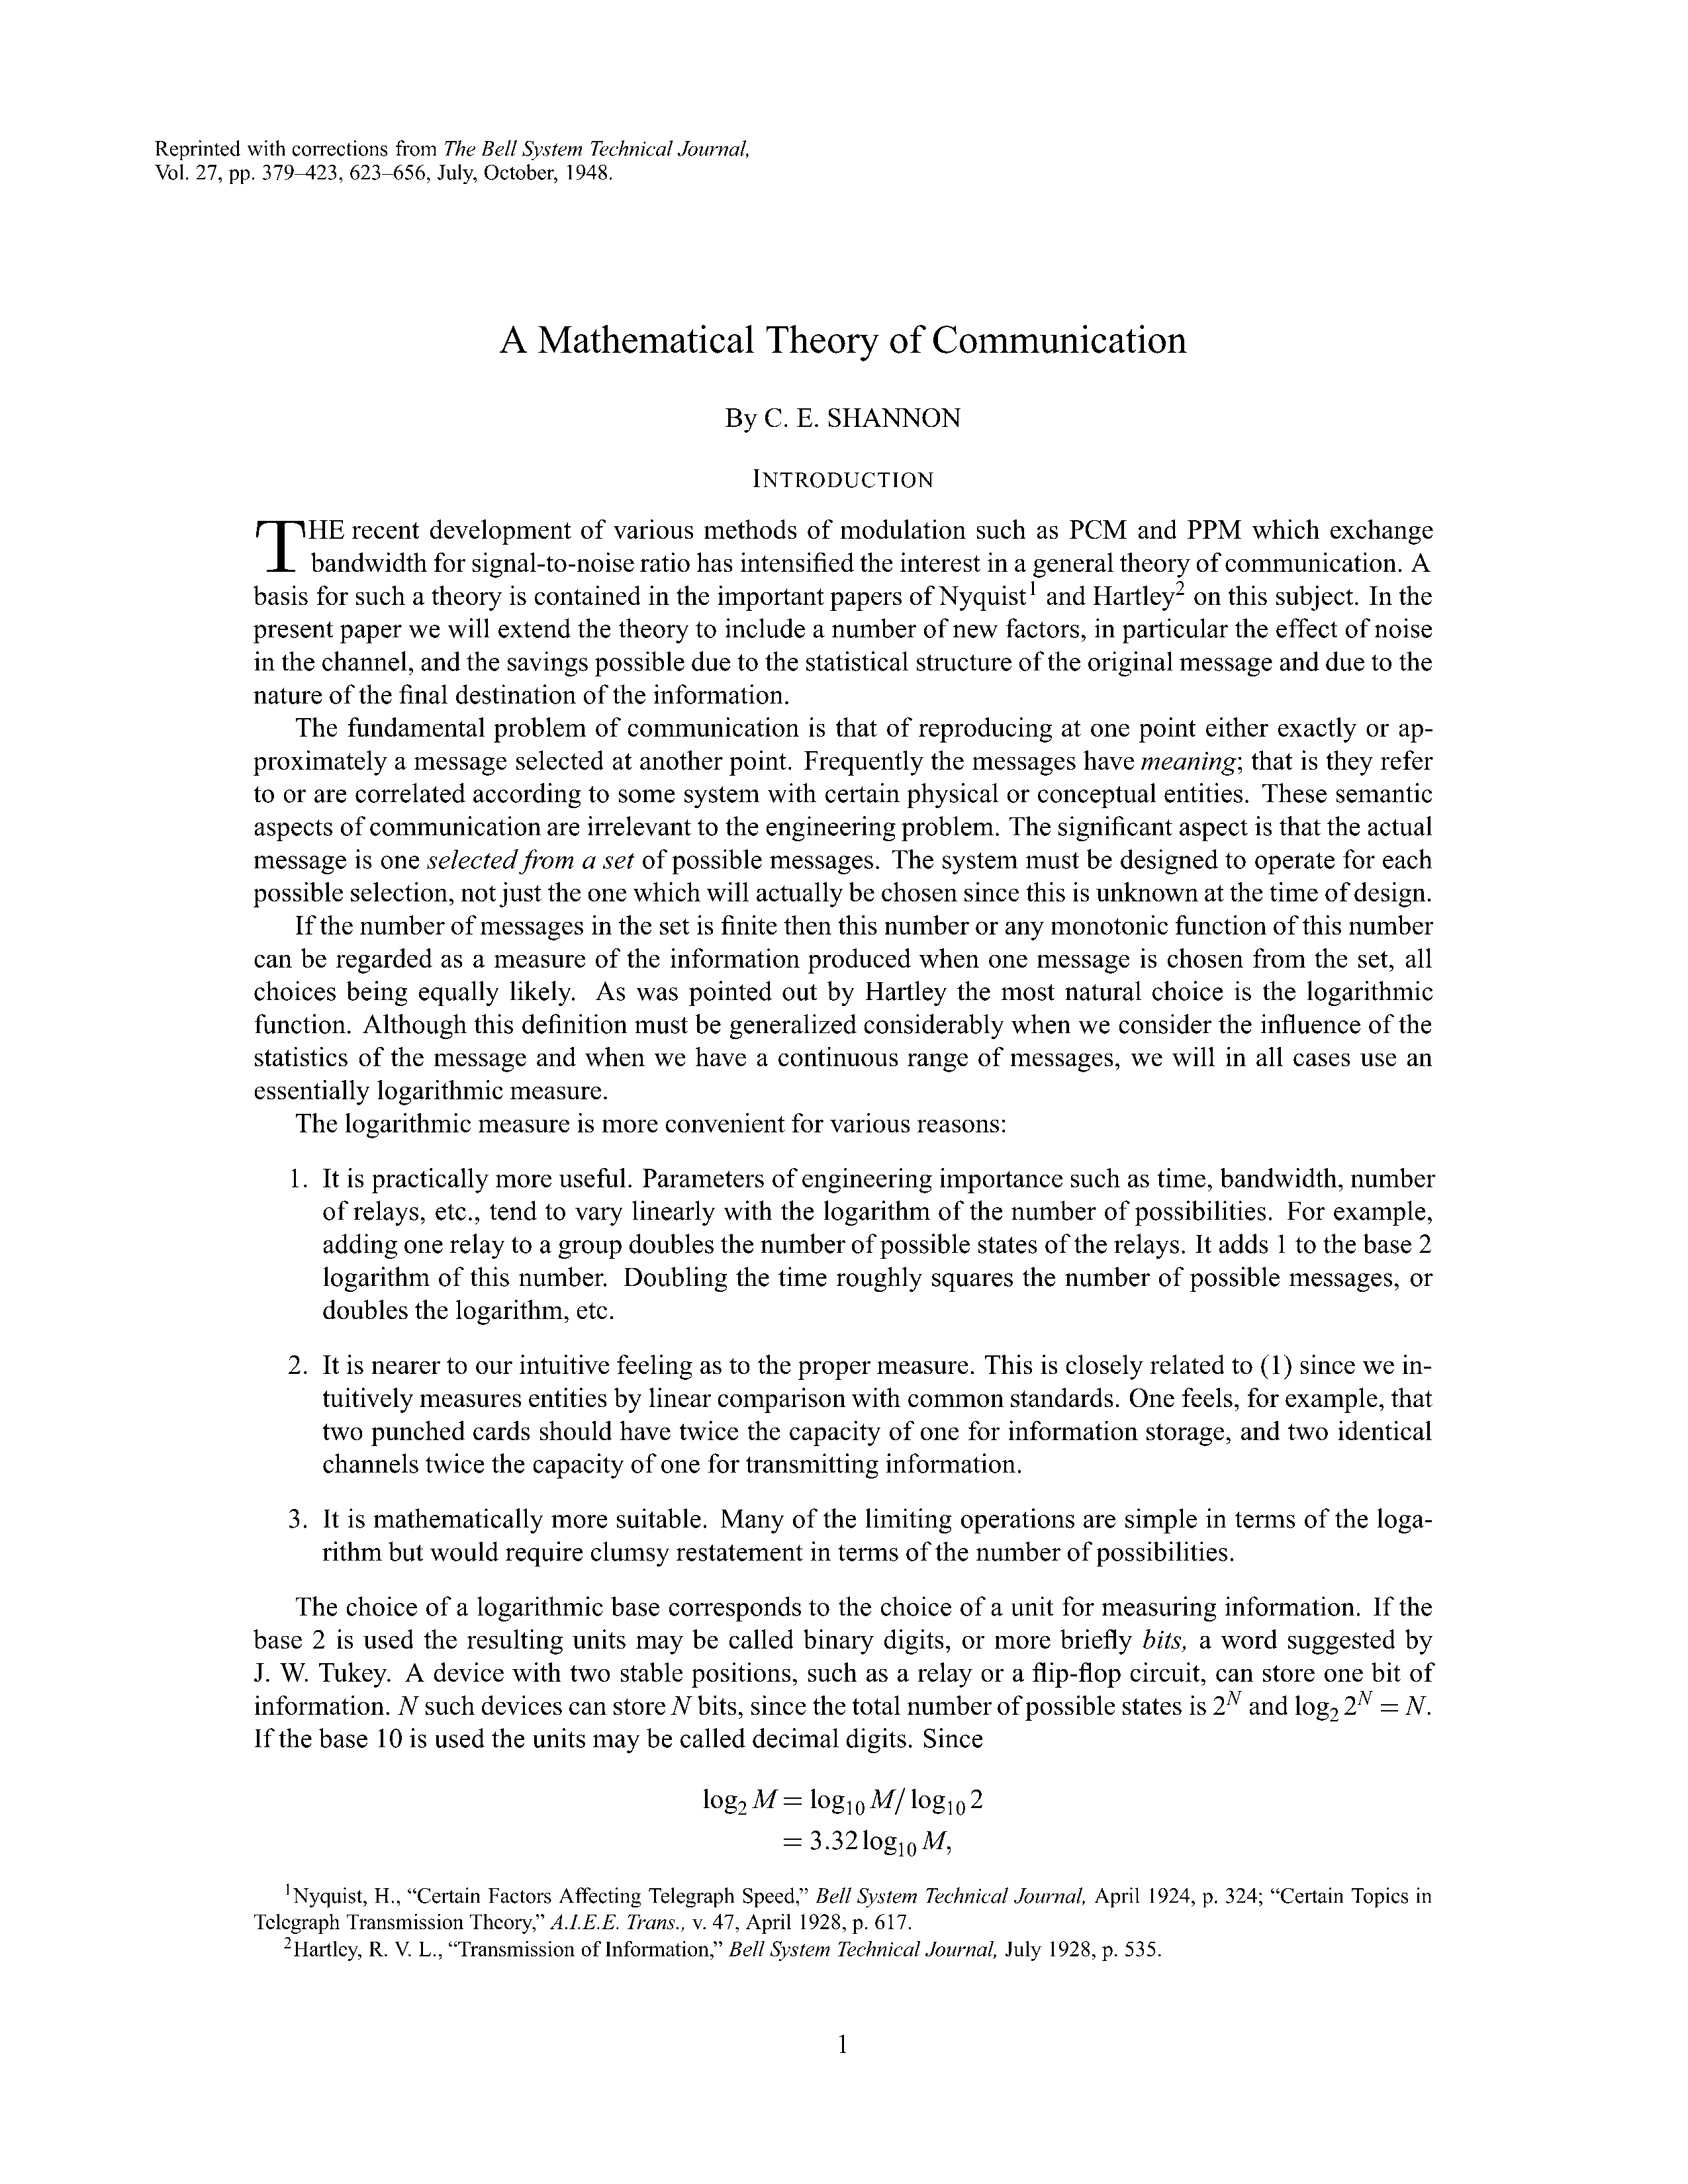

In [1]:
from IPython.display import Image
Image("scan.png")

In [41]:
import collections
from math import log2
import numpy as np

def entropy_markov_chain(l):
    pi = collections.Counter([ (l[i], l[i+1]) for i in range(len(l)-1)])# count each pair
    pi = dict([(k, v/len(im)) for k,v in pi.items()])
    p0 = pi[(0,1)]/(1-pi[(0,0)]+pi[(0,1)])
    p1 = 1-p0
    return -(pi[(0,0)]*log2(pi[(0,0)])+pi[(1,0)]*log2(pi[(1,0)]))*p0\
           -(pi[(0,1)]*log2(pi[(0,1)])+pi[(1,1)]*log2(pi[(1,1)]))*p1

In [42]:
from PIL import Image

img = Image.open("scan.png", mode="r")
print(img.format, img.size, img.mode)
im = np.array(img.getdata())

PNG (2550, 3300) P


In [43]:
entropy_markov_chain(im)

0.16776467500144174

In [44]:
entropy(im)

0.2833745831777161

L'entropy lors qu'on prends en considération la dépendance spaciale est plus faible que dans le cas d'une source sans mémoire.

En effet, dans le premier cas un pixel contient moins d'information car il est possible de déduire ça valeur en fonction des pixels voisins

In [45]:
print(len(im))
print(len(im)*0.17)

8415000
1430550.0


RLE

The first bit say if the sequence start with 0 or 1.

Then we have n bits counters which altern beetween 0 and 1 exept when the counter equal $2^n$

In [46]:
def to_dec(l):
    l.reverse()
    return sum([2**i for i,x in enumerate(l) if x==1])

def to_bin(a, n):
    return [int(x) for x in list(('{0:0'+str(n)+'b}').format(a))]

def count(data, i):
    cnt = 0
    while i+cnt+1<len(data) and data[i+cnt]==data[i+cnt+1]:
        cnt+=1
    return cnt

def rle_encode(data, n=8):
    i = 0
    out = [data[0]]
    while i<len(data):
        cnt = count(data, i)
        while cnt > (2**n)-1-1:
            out.extend([1]*n)
            cnt-=(2**n)-1
            i+=(2**n)-1
        out.extend(to_bin(cnt, n))
        i+=cnt+1
    return out
    
def rle_decode(data, n=8):
    i = 1
    out = []
    cur = data[0]
    while i < len(data):
        l_total = l = to_dec(data[i:i+n])
        while l==(2**n)-1:
            i+=n
            l = to_dec(data[i:i+n])
            l_total += l
        out.extend([cur]*(l_total+1))
        cur = 1 if cur==0 else 0
        i+=n
    return out
    

In [47]:
rle = rle_encode(im)

In [48]:
im2 = rle_decode(rle)

In [105]:
from PIL import Image
import numpy as np

w, h = img.size
data = np.array(im2, dtype=np.uint8)
data = np.reshape(data, (h, w))
img = Image.fromarray(data, 'P')
t=np.array(img.getdata())
img.save("scan2.png")

In [106]:

data = np.array(im, dtype=np.uint8)
data = np.reshape(data, (h, w))
img = Image.fromarray(data, 'P')
img.save("scan3.png")

In [107]:

(t==im2).sum()==len(im2)

True

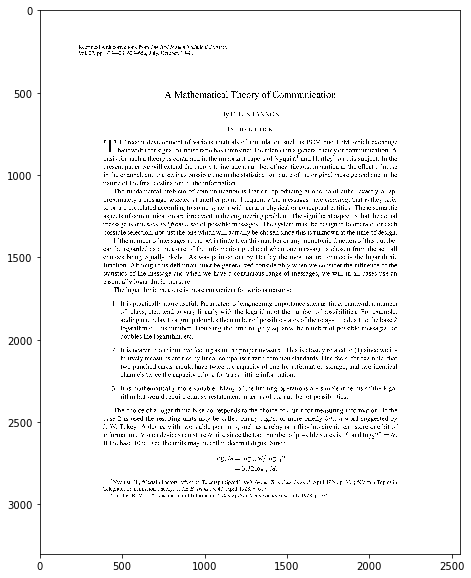

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (20,10))
plt.imshow(data, cmap='Greys_r')
mpimg.imsave("scan2.png", data, cmap='Greys_r')